# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [5]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
y_train.min(), y_train.max()

(0, 9)

In [10]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
x_train.min(), x_train.max()

(0.0, 1.0)

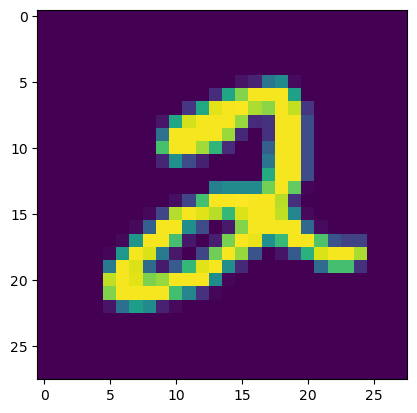

In [12]:
plt.imshow(x_train[5])

In [13]:
y_train[5]

2

# Step 3: Building the LSTM

In [14]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [15]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [18]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [19]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.5537 - accuracy: 0.8232 - val_loss: 0.1370 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1548 - accuracy: 0.9596 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1080 - accuracy: 0.9717 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0845 - accuracy: 0.9778 - val_loss: 0.0555 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0672 - accuracy: 0.9831 - val_loss: 0.0613 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0606 - accuracy: 0.9839 - val_loss: 0.0447 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0502 - accuracy: 0.9869 - val_loss: 0.0503 -

In [20]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class

# Extract the class with the highest probability as the predicted class
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

313/313 [==============================] - 5s 14ms/step


In [21]:
print(y_pred[10]), print(y_test[10])

0
0


(None, None)

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 974    0    0    1    0    0    4    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    1 1019    7    1    1    0    2    0    0]
 [   0    0    3 1000    0    6    0    0    1    0]
 [   0    3    1    0  961    0    5    0    0   12]
 [   0    2    0    1    0  888    1    0    0    0]
 [   1    3    0    0    0    1  952    0    1    0]
 [   0   10    6    0    1    0    0 1006    0    5]
 [   0    4    1    1    1    3    1    1  960    2]
 [   0    4    0    0    6    0    0    1    3  995]]


In [23]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.989


# Step 5: Learning Curve

In [24]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

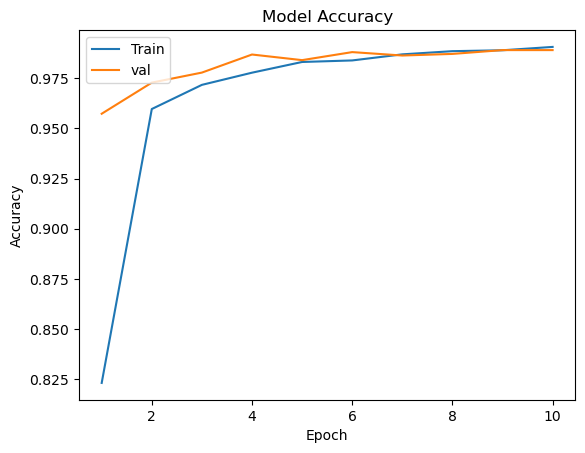

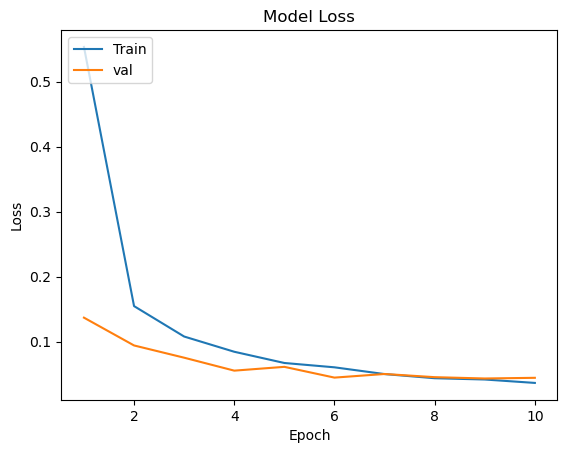

In [25]:
learning_curve(history, 10)